# Initial exploratory analysis of the customers dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [3]:
customers_og_df = pd.read_csv('./data/customers.csv')
customers_og_df = customers_og_df.set_index("CUSTOMER_ID")

In [4]:
customers_og_df.head()

x_customer_id  y_customer_id
CUSTOMER_ID                                   
7894622031164826       7.600289      92.486016
65009550197454        97.647808      36.539666
5381378528001886      98.643812      46.537793
344044685095332        2.814298      57.194127
5281794686066290      49.174496      88.879290

In [5]:
customers_og_df.tail()

x_customer_id  y_customer_id
CUSTOMER_ID                                   
2018185637039049      10.076680      69.035001
7838600820947425      92.012646      86.350366
1310171896045522      92.243870      50.776952
3346506901987756      73.865160      43.451419
5987355644780185      74.174387      12.233790

In [6]:
customers_og_df.describe()

x_customer_id  y_customer_id
count   50000.000000   50000.000000
mean       50.015173      50.233677
std        28.867609      28.969675
min         0.007194       0.000331
25%        24.878218      25.012386
50%        50.267847      50.325364
75%        74.933497      75.449034
max        99.997455      99.999901

In [7]:
missing_values = customers_og_df.isnull().sum()
print(missing_values)

x_customer_id    0
y_customer_id    0
dtype: int64


Text(0.5, 1.0, 'Plot of first 30 customers x and y coordinates')

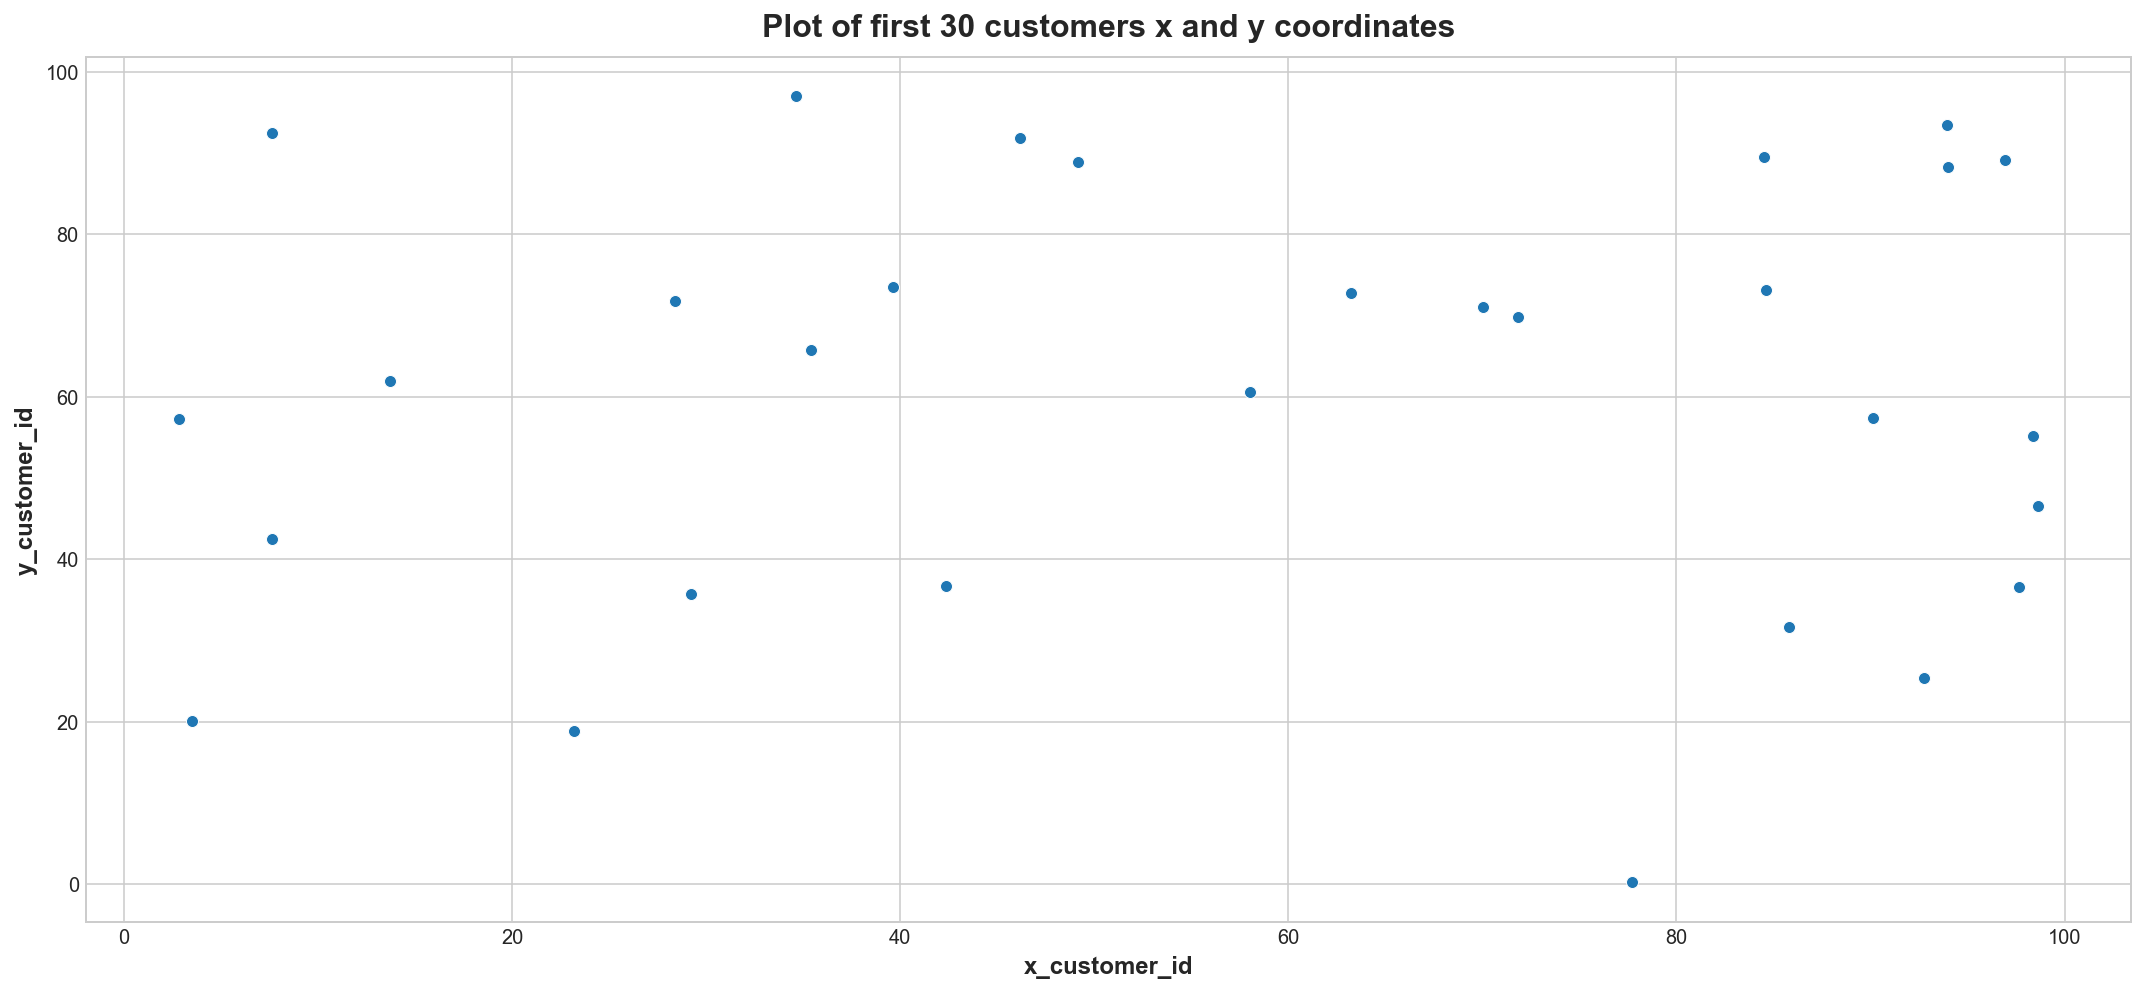

In [8]:
plt.rc("figure", autolayout=True, figsize=(15, 7))
sns.scatterplot(x=customers_og_df['x_customer_id'][:30],y=customers_og_df['y_customer_id'][:30])
plt.title("Plot of first 30 customers x and y coordinates")

#### I currently don't think we should look at outliers in when it comes to x and y data.

### Analysis of customer data location data in combination with indication of fraud.

In [9]:
transactions_train_og = pd.read_csv('./data/transactions_train.csv', usecols=['TX_ID','CUSTOMER_ID','TX_FRAUD'])
transactions_train_og = transactions_train_og.set_index("CUSTOMER_ID")

In [10]:
transactions_train_og.head()

TX_ID  TX_FRAUD
CUSTOMER_ID                                                         
7323088226725338  c6dde46458f3d1cfeb9256f8add45a14fb349f8f         0
8627200351202456  ddd7cafa71ee84f3b46498fb6aa9f92450116719         0
8983139483148479  fe42708ae41a8f25259b96c25e2d6067568c224c         0
2016744441942099  c3c6ffdc73d71f35c0da72032420e15289e4d073         0
6888146658050582  ced166cbbafcf3dc10fa369472253c986b12b6f8         0

In [11]:
customers_og_df.loc[customers_og_df.index == 7323088226725338]

x_customer_id  y_customer_id
CUSTOMER_ID                                   
7323088226725338      27.712334      18.147509

In [16]:
transactions_train_merged  = pd.merge(transactions_train_og,customers_og_df,on='CUSTOMER_ID')
transactions_train_merged.count()

TX_ID            1066440
TX_FRAUD         1066440
x_customer_id    1066440
y_customer_id    1066440
dtype: int64

In [22]:
fraudalent_cases = transactions_train_merged[(transactions_train_merged['TX_FRAUD'] == 1)]
authentic_cases = transactions_train_merged[(transactions_train_merged['TX_FRAUD'] == 0)]

In [24]:
fraudalent_cases.count()

TX_ID            27564
TX_FRAUD         27564
x_customer_id    27564
y_customer_id    27564
dtype: int64

In [25]:
authentic_cases.head()

TX_ID  TX_FRAUD  \
CUSTOMER_ID                                                            
7323088226725338  c6dde46458f3d1cfeb9256f8add45a14fb349f8f         0   
7323088226725338  be513617f069c86be666109296e846a6ba638d5f         0   
7323088226725338  28178a72663cd78b538ad8c4af73d810fe2b65cf         0   
7323088226725338  5f3530378e4ff53d5cc9039a497863279bd49812         0   
7323088226725338  3964548e1f900dff134a81a01290969c53731271         0   

                  x_customer_id  y_customer_id  
CUSTOMER_ID                                     
7323088226725338      27.712334      18.147509  
7323088226725338      27.712334      18.147509  
7323088226725338      27.712334      18.147509  
7323088226725338      27.712334      18.147509  
7323088226725338      27.712334      18.147509

Text(0.5, 1.0, 'Plot of fraudalent transactions customers x and y coordinates')

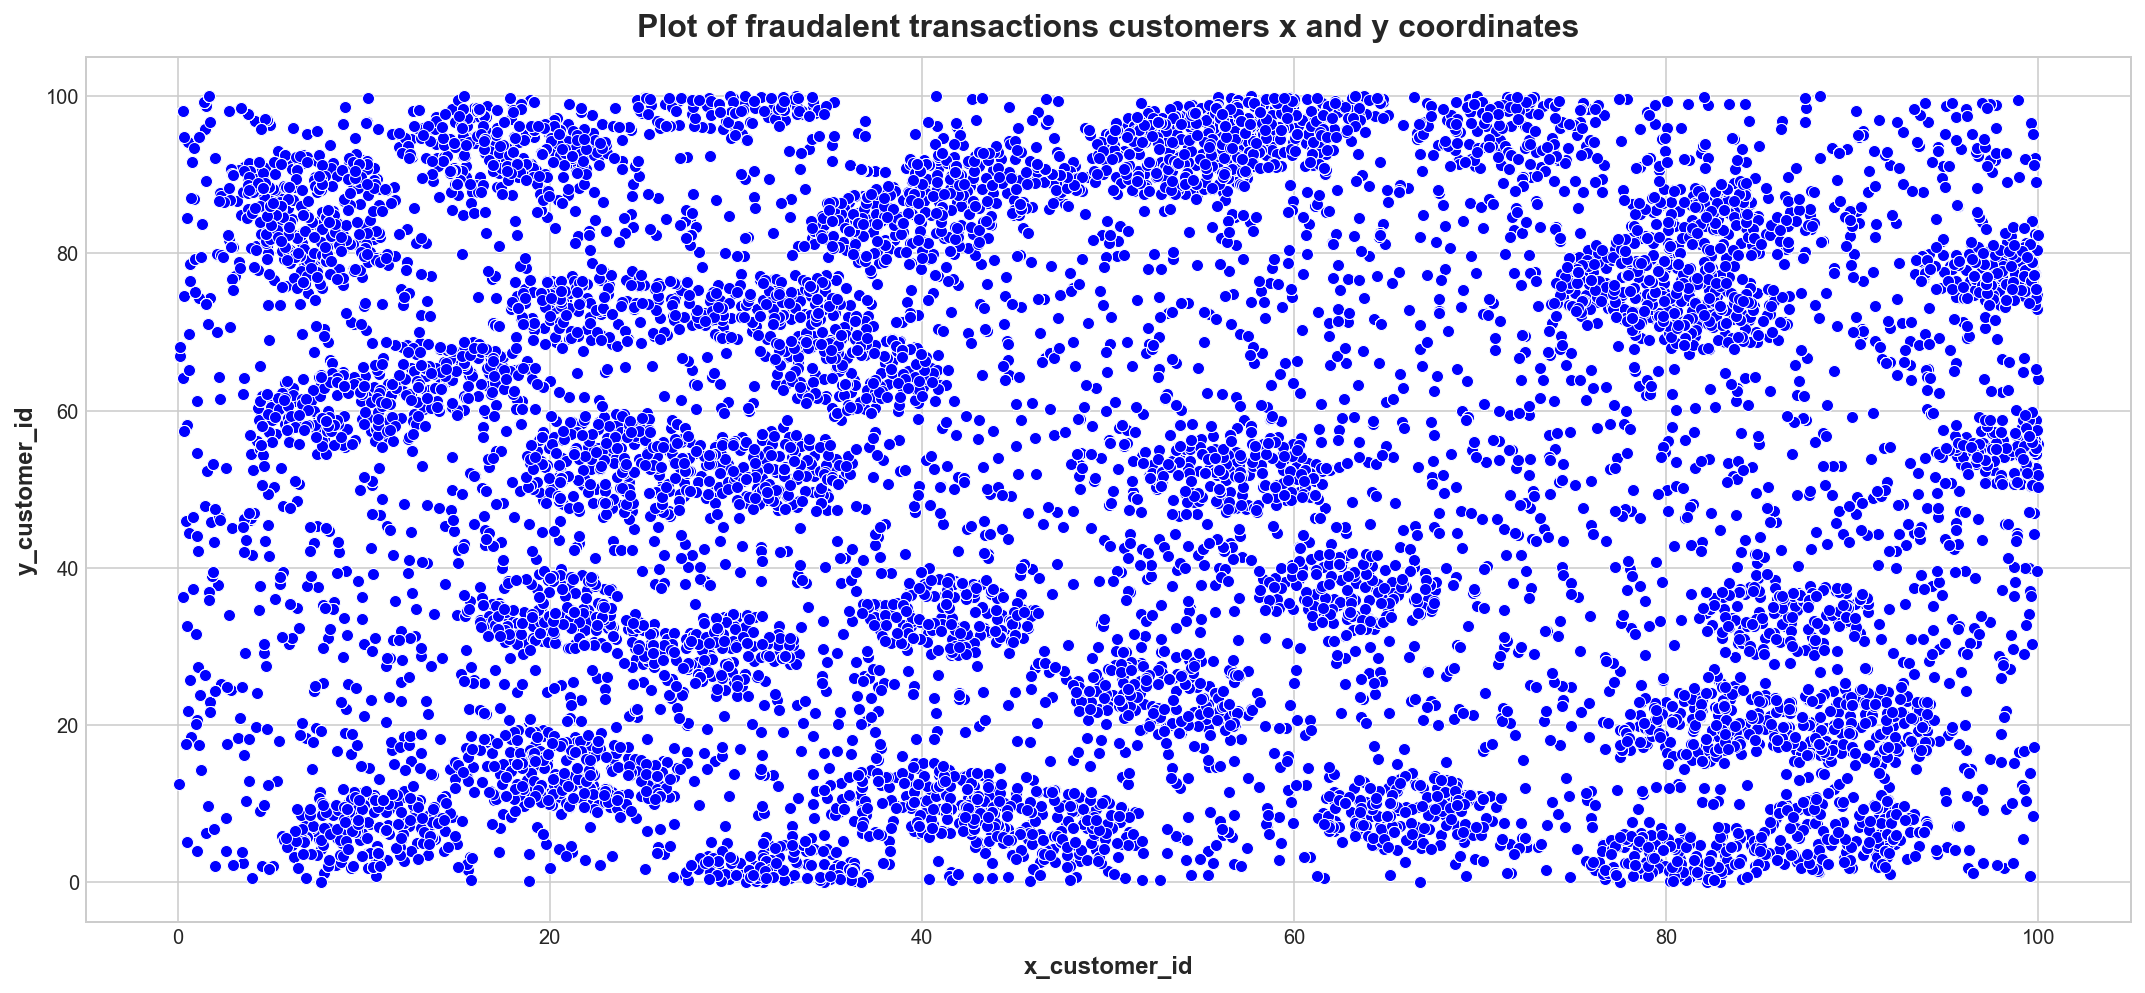

In [30]:
plt.rc("figure", autolayout=True, figsize=(15, 7))
sns.scatterplot(x=fraudalent_cases['x_customer_id'],y=fraudalent_cases['y_customer_id'],color = 'blue')
plt.title("Plot of fraudalent transactions customers x and y coordinates")

Text(0.5, 1.0, 'Plot of authentic transactions customers x and y coordinates')

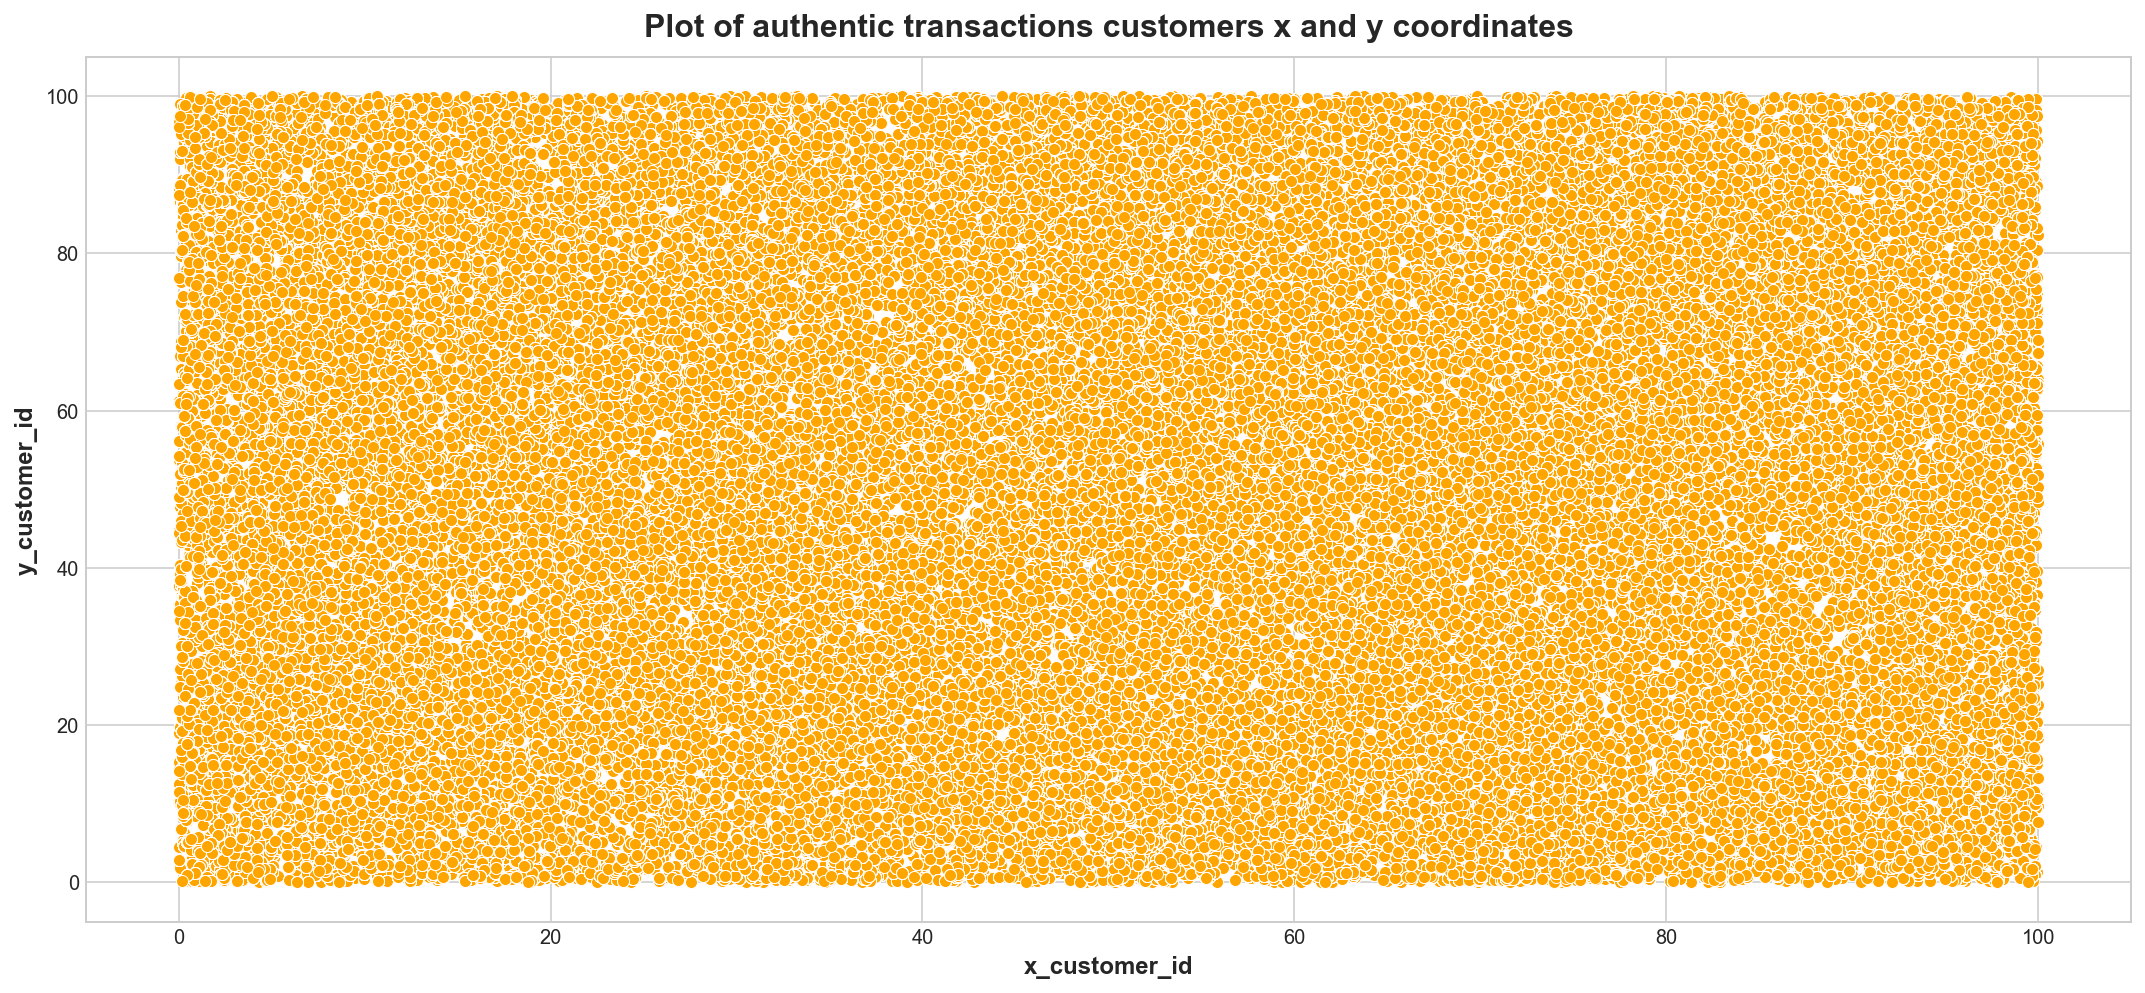

In [31]:
plt.rc("figure", autolayout=True, figsize=(15, 7))
sns.scatterplot(x=authentic_cases['x_customer_id'],y=authentic_cases['y_customer_id'],color = 'orange')
plt.title("Plot of authentic transactions customers x and y coordinates")

Text(0.5, 1.0, 'Plot of both authentic and fraudalent transactions customers x and y coordinates')

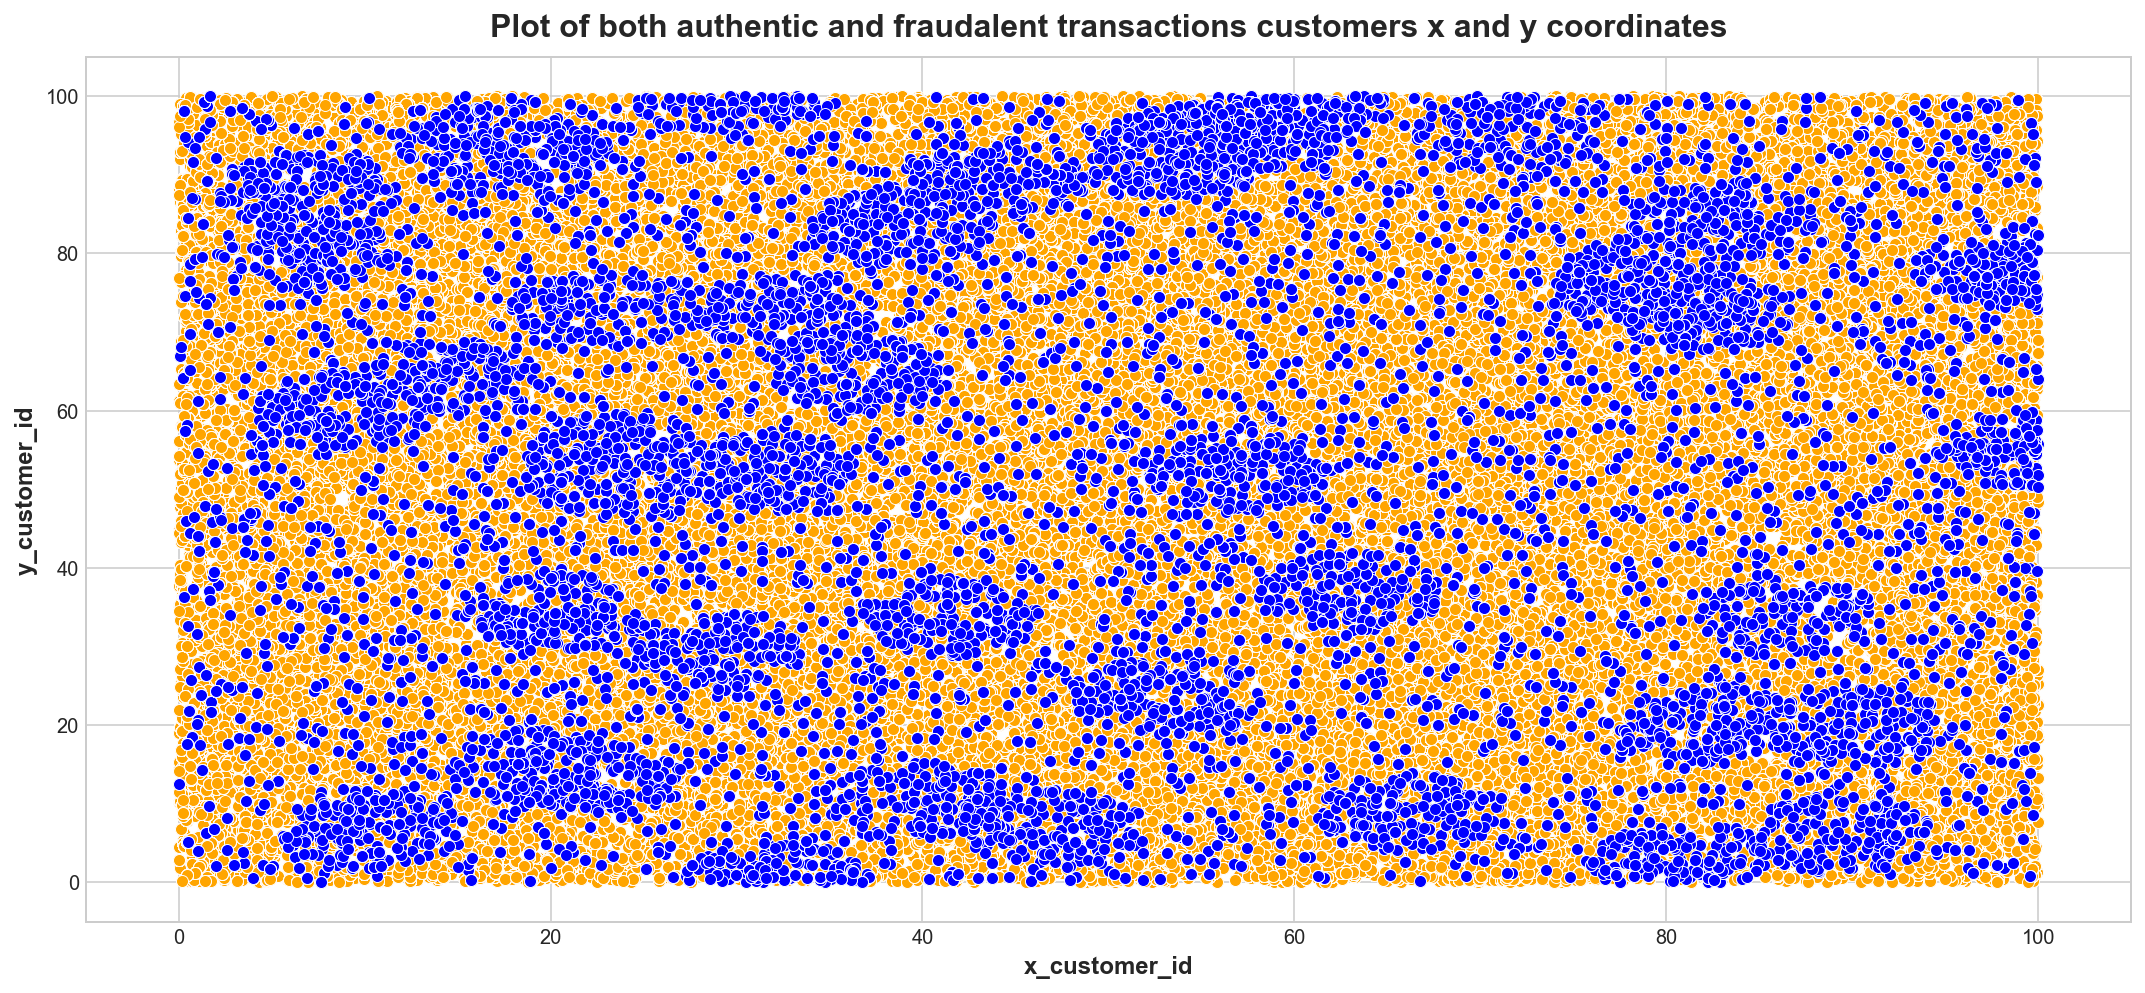

In [32]:
plt.rc("figure", autolayout=True, figsize=(15, 7))
sns.scatterplot(x=authentic_cases['x_customer_id'],y=authentic_cases['y_customer_id'],color = 'orange')
sns.scatterplot(x=fraudalent_cases['x_customer_id'],y=fraudalent_cases['y_customer_id'],color = 'blue')

plt.title("Plot of both authentic and fraudalent transactions customers x and y coordinates")